## Name: Jayesh Nayak

## Roll No.: 121CS0195

In [1]:
!pip install opencv-python --user
!pip install numpy
!pip install matplotlib

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as img

### Question 1 
### By use OpenCV to load an image, implement a mouse click event, and retrieve the coordinate along with the color values of the clicked position on the image.

In [4]:
def mouse_callback(event, x, y, flags, params):
    if event == cv2.EVENT_LBUTTONDOWN:
    # Retrieve color values at the clicked position
        color = img[y, x]
        print(f"Clicked at position ({x}, {y}) with color values: {color}")

In [25]:
# Load an image
img = cv2.imread('Car.jpg')

In [26]:
down_width = 500
down_height = 600
down_points = (down_width, down_height)
img = cv2.resize(img, down_points, interpolation= cv2.INTER_LINEAR)

In [27]:
# Create a window and set the mouse callback function
cv2.namedWindow('Image')
cv2.setMouseCallback('Image', mouse_callback)

cv2.imshow('Image', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

### Question 2
### Read an image with OpenCV and perform drawing operations by using coordinate values, including lines, rectangles, triangle, circle and adding the text "Write your name" in a single operation?

In [45]:
image = img.copy()

In [1]:
# Drawing operations
# Line
# cv2.line(image, start_point, end_point, color, thickness)
cv2.line(image, (50, 50), (200, 50), (0, 255, 0), 2)

# Rectangle
# cv2.rectangle(image, start_point, end_point, color, thickness)
cv2.rectangle(image, (100, 100), (300, 200), (0, 0, 255), 2)

# Triangle (polygon with three points)
pts = np.array([[150, 300], [50, 500], [250, 500]], np.int32)
pts = pts.reshape((-1, 1, 2))
# cv2.polylines(image, [pts], isClosed, color, thickness)
cv2.polylines(image, [pts], True, (255, 0, 56), 2)

# Circle
# cv2.circle(image, center_coordinates, radius, color, thickness)
cv2.circle(image, (400, 150), 50, (255, 255, 31), 2)

# Adding text
# cv2.putText(image, text, org, font, fontScale, color[, thickness[, lineType[, bottomLeftOrigin]]])
font = cv2.FONT_HERSHEY_TRIPLEX
cv2.putText(image, 'Jayesh Nayak', (50, 450), font, 1, (255, 255, 255), 2, cv2.LINE_AA)

NameError: name 'cv2' is not defined

Text(0.5, 1.0, 'Modified Image')

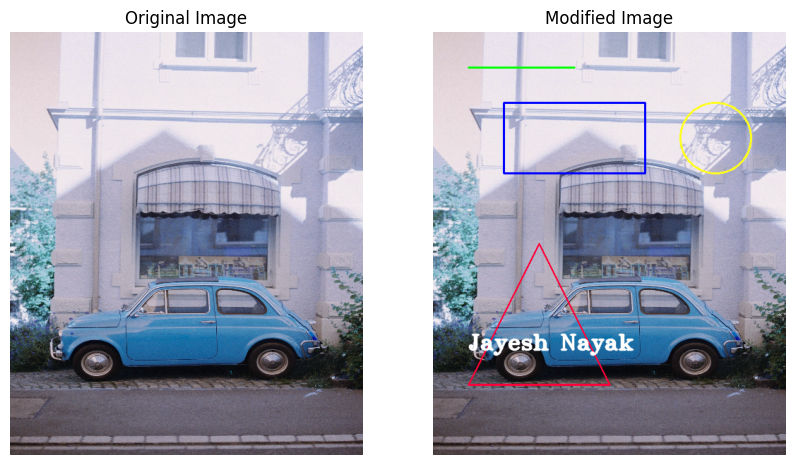

In [47]:
fig = plt.figure(figsize=(10, 7))
rows = 1
columns = 2

#Adding subplot to the image
fig.add_subplot(rows, columns, 1)
# showing image 
plt.imshow(img)
plt.axis('off')
plt.title("Original Image")


#Adding subplot to the image
fig.add_subplot(rows, columns, 2)
# showing image 
plt.imshow(image)
plt.axis('off')
plt.title("Modified Image")

### Question 3
### By utilize OpenCV to perform various geometric transformations such as
### 1.	Image scaling (use different interpolation like Cubic, Linear, Nearest-neighbor, Area and sinusodial)
### 2.	Rotation


In [48]:
image = img.copy()

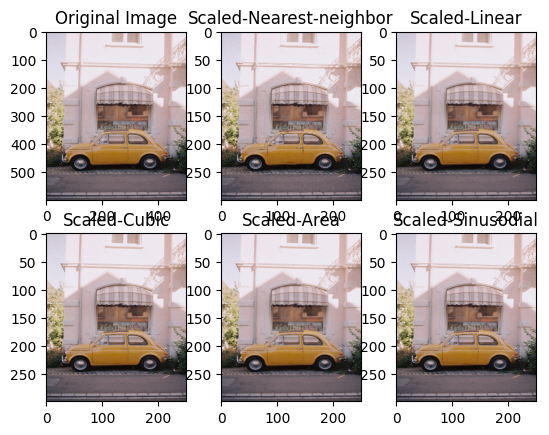

In [67]:
# Display the original image
plt.subplot(2, 3, 1)
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.title('Original Image')

# Image Scaling
# Scaling factor
scale_factor = 0.5

# Different interpolation methods
interpolation_methods = [cv2.INTER_NEAREST, cv2.INTER_LINEAR, cv2.INTER_CUBIC, cv2.INTER_AREA, cv2.INTER_LANCZOS4]
interpolation_names = ['Nearest-neighbor', 'Linear', 'Cubic', 'Area', 'Sinusodial']

# Perform image scaling with different interpolation methods
for i, method in enumerate(interpolation_methods):
    scaled_image = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=method)

    # Display the scaled image
    plt.subplot(2, 3, i+2)
    plt.imshow(cv2.cvtColor(scaled_image, cv2.COLOR_BGR2RGB))
    plt.title('Scaled-' + interpolation_names[i])

In [73]:
# linear = cv2.resize(image, None, fx=scale_factor, fy=scale_factor)
# cv2.imwrite("Linear Interpolation.png", linear)
# area = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_AREA)
# cv2.imwrite("Area Interpolation.png", area)
# cubic = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_CUBIC)
# cv2.imwrite("Cubic Interpolation.png", cubic)
# nearest = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_NEAREST)
# cv2.imwrite("Nearest Interpolation.png", nearest)
# sinusoidal = cv2.resize(image, None, fx=scale_factor, fy=scale_factor, interpolation=cv2.INTER_LANCZOS4)
# cv2.imwrite("Sinusoidal Interpolation.png", sinusoidal)

True

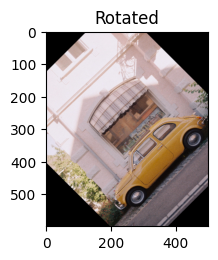

In [57]:
# Image Rotation
# Rotation angle in degrees
angle = 45

# Get the center of the image
height, width = image.shape[:2]
center = (width // 2, height // 2)

# Perform image rotation
rotation_matrix = cv2.getRotationMatrix2D(center, angle, 1.0)
rotated_image = cv2.warpAffine(image, rotation_matrix, (width, height))

# Display the rotated image
plt.subplot(2, 3, 6)
plt.imshow(cv2.cvtColor(rotated_image, cv2.COLOR_BGR2RGB))
plt.title('Rotated Image')

plt.tight_layout()
plt.show()

### Question 4
### Write code using OpenCV to read an image and apply an affine transformation with a translation of 20 pixels in the x-axis and 30 pixels in the y-axis. Display both the original and transformed images.

In [74]:
image = img.copy()

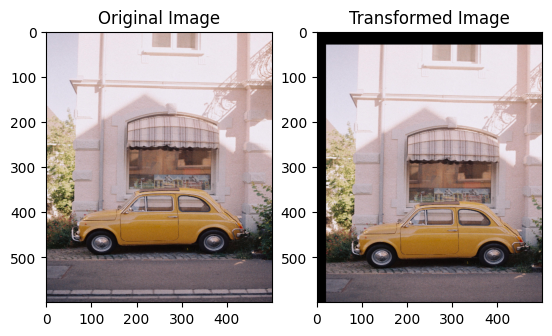

In [83]:
tx, ty = 20, 30
transformation_matrix = np.float32([[1, 0, tx], [0, 1, ty]])
# Apply the affine transformation
transformed_image = cv2.warpAffine(image, transformation_matrix, (image.shape[1], image.shape[0]))

# Display the original and transformed images
plt.subplot(121), plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB)), plt.title('Original Image')
plt.subplot(122), plt.imshow(cv2.cvtColor(transformed_image, cv2.COLOR_BGR2RGB)), plt.title('Transformed Image')
plt.show()

### Question 5
### 5. Create a program that reads an image and applies a Motion blur to it using the filter shown in the image below. Display both the original image and the blurred image.

In [84]:
image = img.copy()

In [115]:
kernel = np.array([[0,0,0,0,0],[0,0,0,0,0],[1,1,1,1,1],[0,0,0,0,0],[0,0,0,0,0]])
kernel = kernel/5

In [116]:
# cv2.filter2D (src, dst, ddepth, kernel)
blurred_image = cv2.filter2D(image, -1, kernel=kernel)

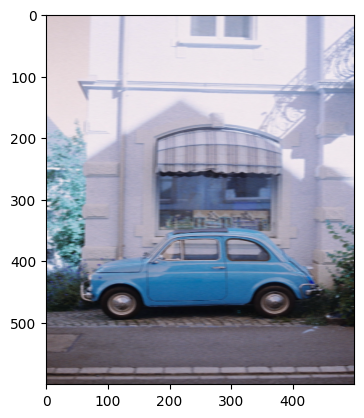

In [117]:
plt.imshow(blurred_image)